# AUTOMOTIVE INDUSTRY

Problem to be solved: Determine which existing vehicles on the market are most like the prototypes on automobile manufacturer has developed for a new vehicle; which models the manufacturer will be competing against. The goal is to summarize the existing vehicles and help manufacturers to make decisions about the supply of new models.

## The dataset

We have downloaded the car dataset, Car_sales.csv, which include information about different cars . This data set is being taken from Kaggle. [Dataset source](https://www.kaggle.com/gagandeep16/car-sales)

These are the columns of the dataset:
- **Manufacturer**
- **Model**
- **Sales_in_thousands**
- **__year_resale_value**
- **Vehicle_type**
- **Price_in_thousands**
- **Engine_size**
- **Horsepower**
- **Wheelbase**
- **Width**
- **Length**
- **Curb_weight**
- **Fuel_capacity**
- **Fuel_efficiency**
- **Latest_Launch**
- **Power_perf_factor**

## Explore the dataset

Importe Pandas,Numpy and other necessary libraries. Open the dataset which is in csv format using the pd.read_csv() method of Pandas. After that, check the first rows of the dataframe.

In [1]:
# importing necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization on top of matplotlib

In [2]:
#import data
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_01cc527bb96d4bf4a425a055e527cada = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='b82ZZUzL652upPKrBDIIzVcumAE--dvhoXpzzes8FBFs',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_01cc527bb96d4bf4a425a055e527cada.get_object(Bucket='mlprojectsforvariousindustries-donotdelete-pr-cswviijcwiynz0',Key='Car_sales.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df = pd.read_csv(body)
df.head()


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


Now use the **df.info()** method to get the better idea of the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
Manufacturer           157 non-null object
Model                  157 non-null object
Sales_in_thousands     157 non-null float64
__year_resale_value    121 non-null float64
Vehicle_type           157 non-null object
Price_in_thousands     155 non-null float64
Engine_size            156 non-null float64
Horsepower             156 non-null float64
Wheelbase              156 non-null float64
Width                  156 non-null float64
Length                 156 non-null float64
Curb_weight            155 non-null float64
Fuel_capacity          156 non-null float64
Fuel_efficiency        154 non-null float64
Latest_Launch          157 non-null object
Power_perf_factor      155 non-null float64
dtypes: float64(12), object(4)
memory usage: 19.7+ KB


## Data cleaning

Lets see the size of the dataframe with the **df.shape** method. (Number of rows, number of columns)

In [4]:
df.shape

(157, 16)

Check for duplicade rows and drop them if exist, by keeping the last found.

In [5]:
df.drop_duplicates(keep ='last')
df.shape

(157, 16)

Since the shape of the dataset didn't change, means the raw dataset don't have duplicate row/values.

Now, use **df.dtypes** method to check out the data type of each column in the dataset.

In [6]:
df.dtypes

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
dtype: object

Lets simply clear the dataset by dropping the rows that have null value:

In [7]:
print ("Shape of dataset before cleaning: ", df.size)
df[[ 'Sales_in_thousands', '__year_resale_value', 'Price_in_thousands', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Power_perf_factor']] = df[['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Power_perf_factor']].apply(pd.to_numeric, errors='coerce')
df = df.dropna()
df = df.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", df.size)
df.head(5)

Shape of dataset before cleaning:  2512
Shape of dataset after cleaning:  1872


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
3,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
4,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105


Finding maximum/minimum values through function. Apply it on feature 'Sales_in_thousands'.

## Analysis of the data and Visualizations

Use the **df.describe()** method, which computes the basic statistics for all continuous variables.

The result will contain the following things:

- the count or frequency.
- the mean or average.
- the standard deviation (std).
- the minimum value
- the IQR (Interquartile Range: 25%, 50% and 75%)
- the maximum value


In [8]:
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,59.112316,18.031538,25.969487,3.048718,181.282051,107.326496,71.189744,187.717949,3.324051,17.812821,24.119658,74.930921
std,75.058933,11.605632,14.149699,1.055169,58.591786,8.050588,3.530151,13.849926,0.597177,3.794609,4.404470,25.771796
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,16.767000,11.240000,16.980000,2.200000,140.000000,102.400000,68.500000,177.500000,2.911000,15.300000,22.000000,55.297117
50%,32.299000,14.010000,21.665000,3.000000,175.000000,107.000000,70.400000,187.800000,3.340000,17.200000,24.000000,70.660942
75%,76.029000,19.875000,29.465000,3.800000,210.000000,111.600000,73.600000,196.500000,3.823000,19.800000,26.000000,85.828408
max,540.561000,67.550000,82.600000,8.000000,450.000000,138.700000,79.300000,224.500000,5.115000,32.000000,45.000000,188.144323


Additionly, use the **df.describe()** method with an additional argument in it " include = 'all' " , which computes the basic statistics for all continuous variables as well as some statistics for the categorical variables.

Few additional things will be added:

- The number of unique values (unique)
- The most frequent value (top)
- The frequency of the top element (freq)

In [9]:
df.describe(include = 'all')

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
count,117,117,117.000000,117.000000,117,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117,117.000000
unique,26,116,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108,NaN
top,Ford,Neon,NaN,NaN,Passenger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3/7/2011,NaN
freq,10,2,NaN,NaN,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
mean,NaN,NaN,59.112316,18.031538,NaN,25.969487,3.048718,181.282051,107.326496,71.189744,187.717949,3.324051,17.812821,24.119658,NaN,74.930921
std,NaN,NaN,75.058933,11.605632,NaN,14.149699,1.055169,58.591786,8.050588,3.530151,13.849926,0.597177,3.794609,4.404470,NaN,25.771796
min,NaN,NaN,0.110000,5.160000,NaN,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,NaN,23.276272
25%,NaN,NaN,16.767000,11.240000,NaN,16.980000,2.200000,140.000000,102.400000,68.500000,177.500000,2.911000,15.300000,22.000000,NaN,55.297117
50%,NaN,NaN,32.299000,14.010000,NaN,21.665000,3.000000,175.000000,107.000000,70.400000,187.800000,3.340000,17.200000,24.000000,NaN,70.660942
75%,NaN,NaN,76.029000,19.875000,NaN,29.465000,3.800000,210.000000,111.600000,73.600000,196.500000,3.823000,19.800000,26.000000,NaN,85.828408


## Correlation

A mutual interdependence between two or more things is known as correlation. Check the Correlation between the continuous variables using the **df.corr()** method.


In [10]:
tmp = df.corr()
tmp

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Sales_in_thousands,1.000000,-0.275426,-0.251705,0.038111,-0.152538,0.406839,0.177802,0.272336,0.067184,0.138045,-0.066927,-0.175562
__year_resale_value,-0.275426,1.000000,0.954757,0.527187,0.773110,-0.053685,0.178128,0.025390,0.363274,0.324796,-0.398459,0.829511
Price_in_thousands,-0.251705,0.954757,1.000000,0.649170,0.853455,0.067042,0.301292,0.182592,0.511400,0.406496,-0.479539,0.905002
Engine_size,0.038111,0.527187,0.649170,1.000000,0.861618,0.410020,0.671756,0.537343,0.742831,0.616862,-0.724871,0.841005
Horsepower,-0.152538,0.773110,0.853455,0.861618,1.000000,0.225905,0.507275,0.400968,0.598603,0.479790,-0.595844,0.994071
Wheelbase,0.406839,-0.053685,0.067042,0.410020,0.225905,1.000000,0.675559,0.853669,0.675609,0.658654,-0.470455,0.200228
Width,0.177802,0.178128,0.301292,0.671756,0.507275,0.675559,1.000000,0.743226,0.735957,0.672191,-0.599604,0.478889
Length,0.272336,0.025390,0.182592,0.537343,0.400968,0.853669,0.743226,1.000000,0.684305,0.562504,-0.465682,0.366831
Curb_weight,0.067184,0.363274,0.511400,0.742831,0.598603,0.675609,0.735957,0.684305,1.000000,0.847994,-0.818819,0.597586
Fuel_capacity,0.138045,0.324796,0.406496,0.616862,0.479790,0.658654,0.672191,0.562504,0.847994,1.000000,-0.808506,0.478484


### Heat Map

Draw the heatmap of the columns below.


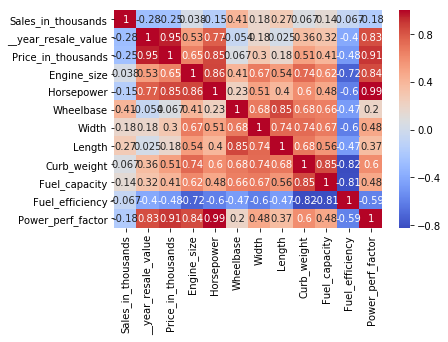

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df[['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Power_perf_factor']].corr(),cmap='coolwarm',annot=True)

Lets focues on the correlations of features with Price_in_thousands column.

In [12]:
df_corr = df.corr()['Price_in_thousands'][:-1]
df_corr

Sales_in_thousands    -0.251705
__year_resale_value    0.954757
Price_in_thousands     1.000000
Engine_size            0.649170
Horsepower             0.853455
Wheelbase              0.067042
Width                  0.301292
Length                 0.182592
Curb_weight            0.511400
Fuel_capacity          0.406496
Fuel_efficiency       -0.479539
Name: Price_in_thousands, dtype: float64

We see a strong correlation of Price_in_thousands with _year_resale_value and Hoursepower.

Lets look at the pairplotfocusing again on Price_in_thousands column.

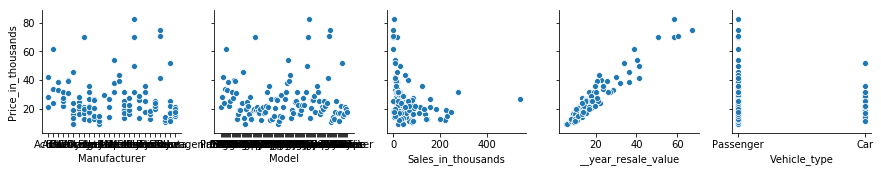

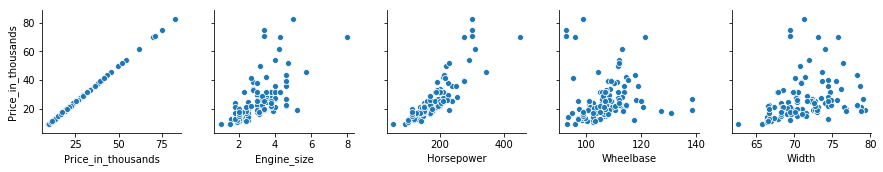

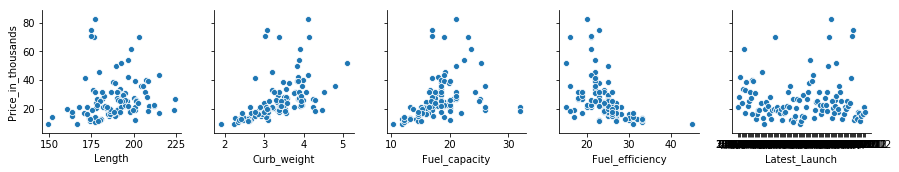

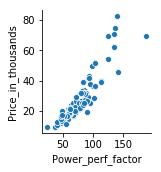

In [13]:
for i in range(0, len(df.columns),5):
    sns.pairplot(df, y_vars ='Price_in_thousands', x_vars = df.columns[i:i+5]  )

In [14]:
def max_min_val(col):
    '''
    This function takes the column name as the argument
    and returns the top and bottom observations in the dataframe
    '''
    first = df[col].idxmax()
    first_obs = pd.DataFrame(df.loc[first])
    
    last = df[col].idxmin()
    last_obs = pd.DataFrame(df.loc[last])
    
    min_max_obs = pd.concat([first_obs, last_obs], axis=1)
    
    return min_max_obs

max_min_val('Sales_in_thousands')

,46,68
Manufacturer,Ford,Mitsubishi
Model,F-Series,3000GT
Sales_in_thousands,540.561,0.11
__year_resale_value,15.075,20.94
Vehicle_type,Car,Passenger
Price_in_thousands,26.935,25.45
Engine_size,4.6,3
Horsepower,220,161
Wheelbase,138.5,97.2
Width,79.1,72.4


The Fold F-Series has the most sales, while the Mitsubishi 3000GT has the fewest.

Count number of cars grouped by Manufacturer.

In [15]:
make_dist = df.groupby('Manufacturer').size()
make_dist

Manufacturer
Acura          3
Audi           3
BMW            2
Buick          4
Cadillac       3
Chevrolet      8
Chrysler       5
Dodge          9
Ford          10
Honda          5
Hyundai        3
Infiniti       1
Jeep           3
Lexus          3
Lincoln        2
Mercedes-B     4
Mercury        6
Mitsubishi     7
Nissan         5
Oldsmobile     4
Plymouth       3
Pontiac        5
Porsche        3
Saturn         3
Toyota         8
Volkswagen     5
dtype: int64

Ford has 10 vehicles on the clean dataset, with Dodge following with 9 and Toyota with Chervolet following with 8.

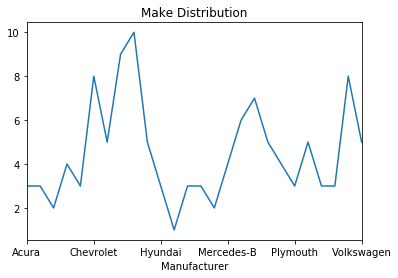

In [16]:
make_dist.plot(title = 'Make Distribution')

Creating histogram for continuous numerical variable.

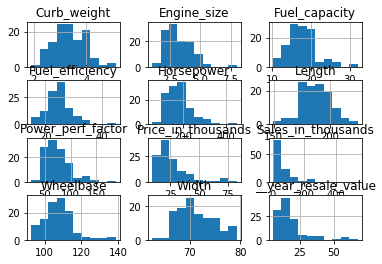

In [17]:
viz = df[['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Power_perf_factor']]
viz.hist()
plt.show()

## Preparation for Clustering

#### Feature selection
Lets select our feature set:

In [18]:
featureset = df[['Engine_size',  'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency']]

### Normalization
Now we can normalize the feature set. __MinMaxScaler__ transforms features by scaling each feature to a given range. It is by default (0, 1). That is, this estimator scales and translates each feature individually such that it is between zero and one.

In [19]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

<h2 id="clustering_using_scipy">Clustering using Scipy</h2>
In this part we use Scipy package to cluster the dataset:  
First, we calculate the distance matrix. 

In [20]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

In agglomerative clustering, at each iteration, the algorithm must update the distance matrix to reflect the distance of the newly formed cluster with the remaining clusters in the forest. The following methods are supported in Scipy for calculating the distance between the newly formed cluster and each: - single - complete - average - weighted - centroid.

In [21]:
import pylab
import scipy.cluster.hierarchy
Z = scipy.cluster.hierarchy.linkage(D, 'complete')

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  app.launch_new_instance()


Essentially, Hierarchical clustering does not require a pre-specified number of clusters. However, in some applications we want a partition of disjoint clusters just as in flat clustering.
So you can use a cutting line:

In [22]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 1,  5,  5,  6,  5,  4,  6,  5,  5,  5,  5,  5,  4,  4,  5,  1,  6,
        5,  5,  5,  4,  2, 11,  6,  6,  5,  6,  5,  1,  6,  6, 10,  9,  8,
        9,  3,  5,  1,  7,  6,  5,  3,  5,  3,  8,  7,  9,  2,  6,  6,  5,
        4,  2,  1,  6,  5,  2,  7,  5,  5,  5,  4,  4,  3,  2,  6,  6,  5,
        7,  4,  7,  6,  6,  5,  3,  5,  5,  6,  5,  4,  4,  1,  6,  5,  5,
        5,  6,  4,  5,  4,  1,  6,  5,  6,  6,  5,  5,  5,  7,  7,  7,  2,
        2,  1,  2,  6,  5,  1,  1,  1,  7,  8,  1,  1,  6,  1,  1],
      dtype=int32)

Also, you can determine the number of clusters directly:

In [23]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 2, 1,
       5, 3, 3, 3, 3, 3, 1, 3, 3, 4, 4, 4, 4, 2, 3, 1, 3, 3, 3, 2, 3, 2,
       4, 3, 4, 1, 3, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 1, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 2,
       3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       3, 4, 1, 1, 3, 1, 1], dtype=int32)

Now, plot the dendrogram:

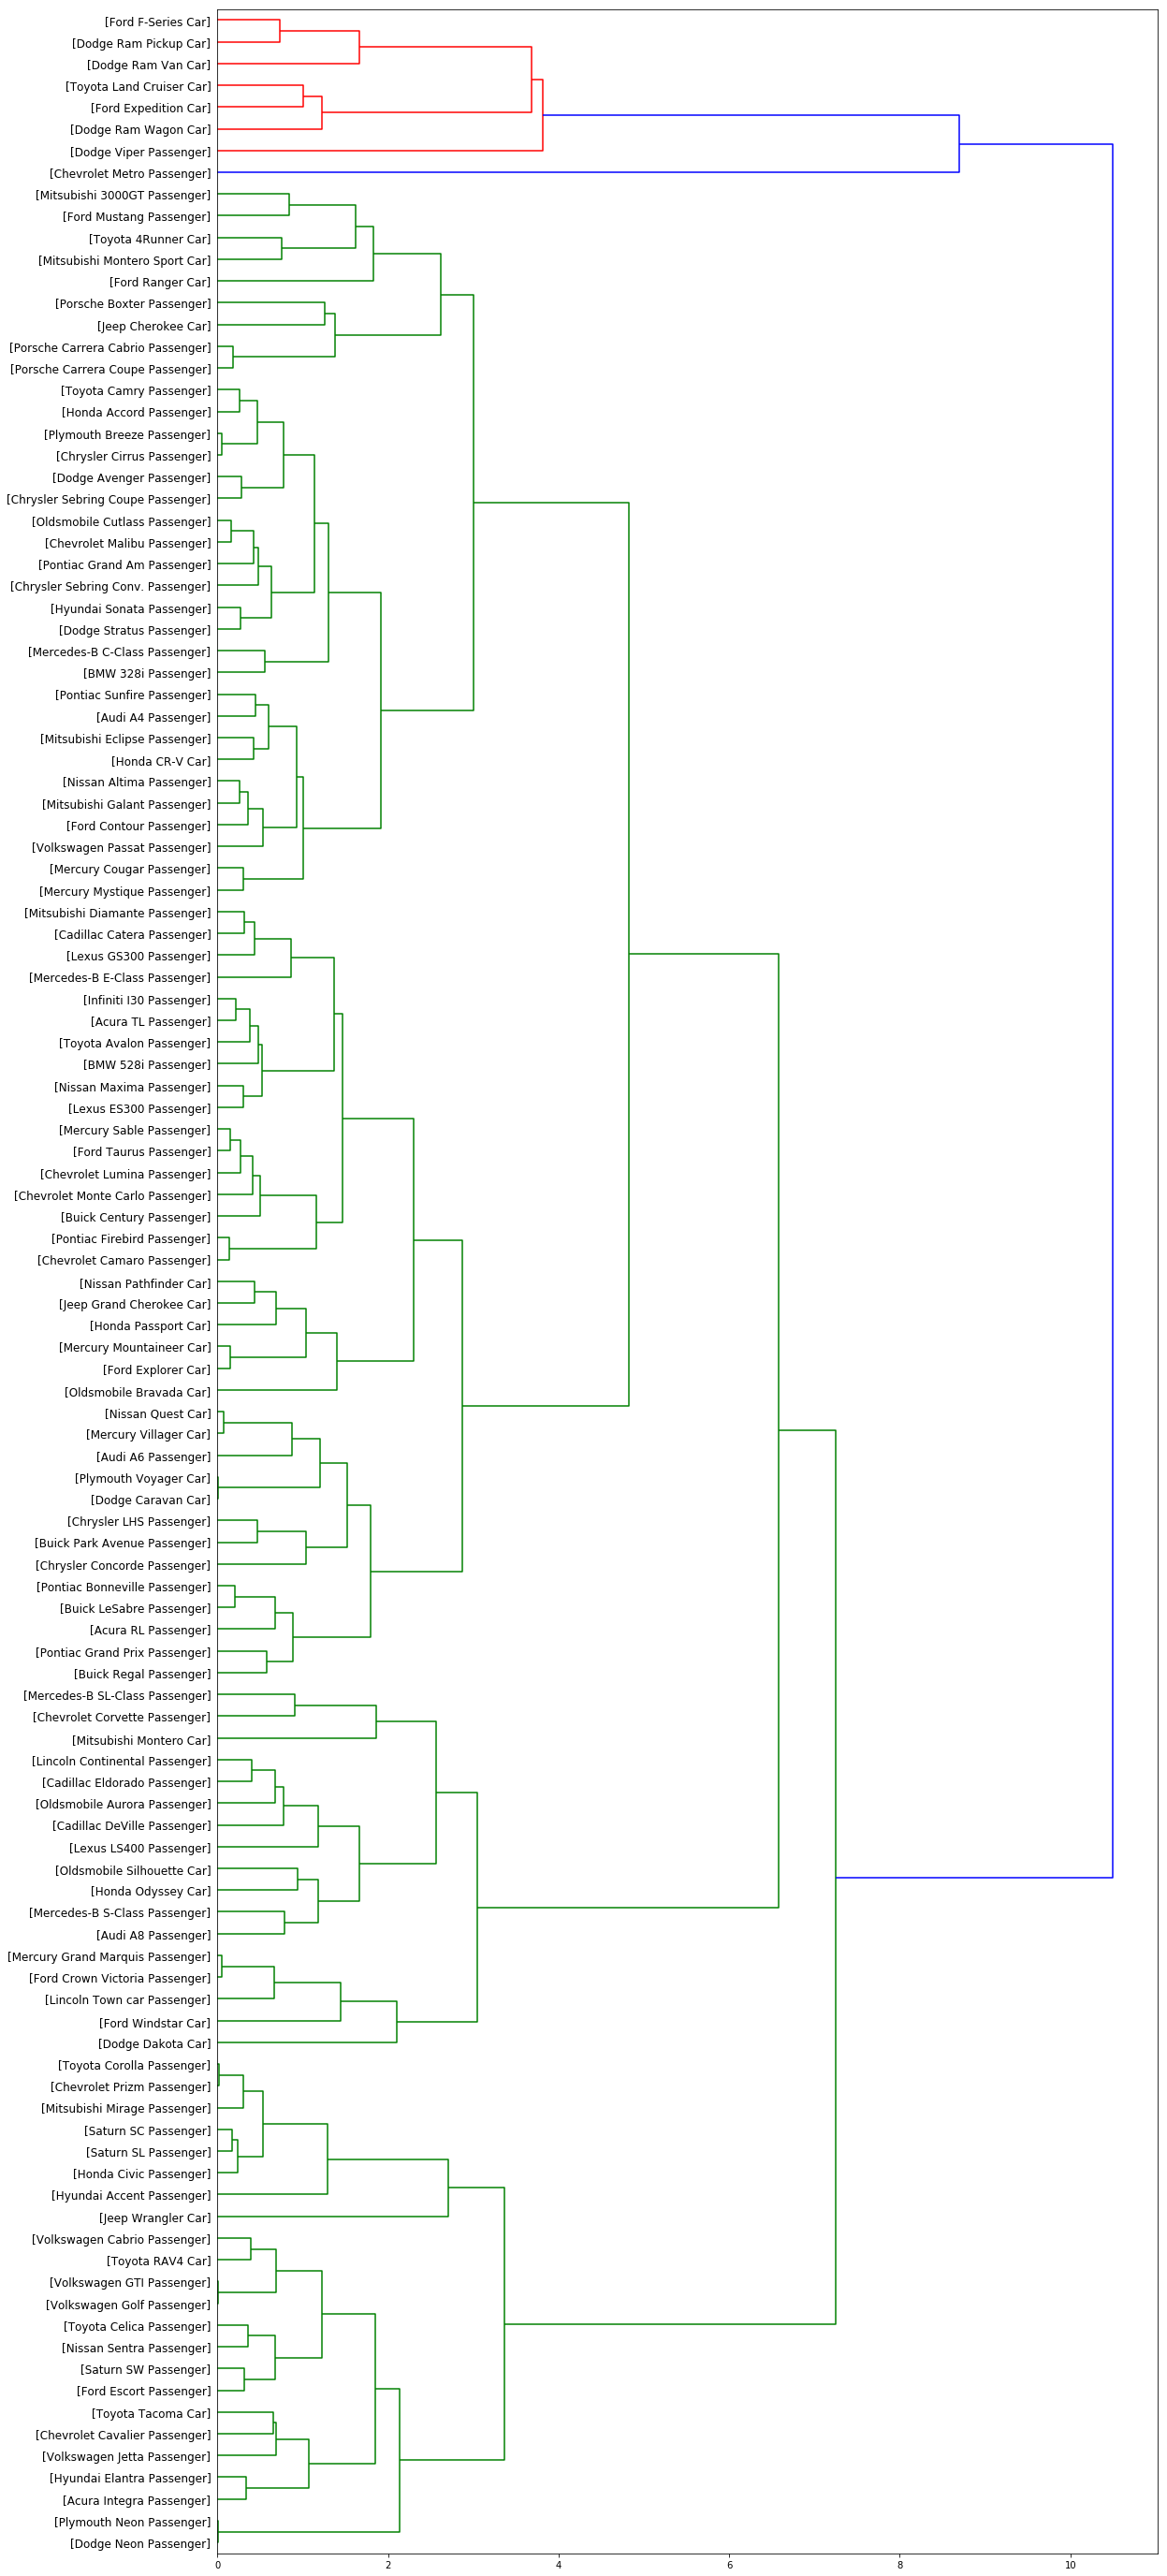

In [24]:
ig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df['Manufacturer'][id], df['Model'][id], df['Vehicle_type'][id])
    
dendro = scipy.cluster.hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

### Clustering using scikit-learn
Lets redo it again, but this time using scikit-learn package:

In [25]:
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 

In [26]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


Now, we can use the 'AgglomerativeClustering' function from scikit-learn library to cluster the dataset. The AgglomerativeClustering performs a hierarchical clustering using a bottom up approach. The linkage criteria determines the metric used for the merge strategy:

- Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
- Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.
- Average linkage minimizes the average of the distances between all observations of pairs of clusters.

In [27]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([1, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 3, 3, 2, 1, 1, 2, 2, 2, 5, 1,
       4, 1, 1, 2, 1, 2, 1, 1, 1, 5, 0, 0, 0, 3, 2, 1, 2, 1, 2, 3, 2, 3,
       0, 3, 0, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 3, 2, 3, 1, 2, 3, 5, 1, 1, 2, 3, 2, 1, 3,
       2, 3, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 1])

And, we can add a new field to our dataframe to show the cluster of each row:

In [28]:
df['cluster_'] = agglom.labels_
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,cluster_
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,1
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778,2
2,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779,2
3,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639,1
4,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105,2


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0, 0.5, 'Fuel_efficiency')

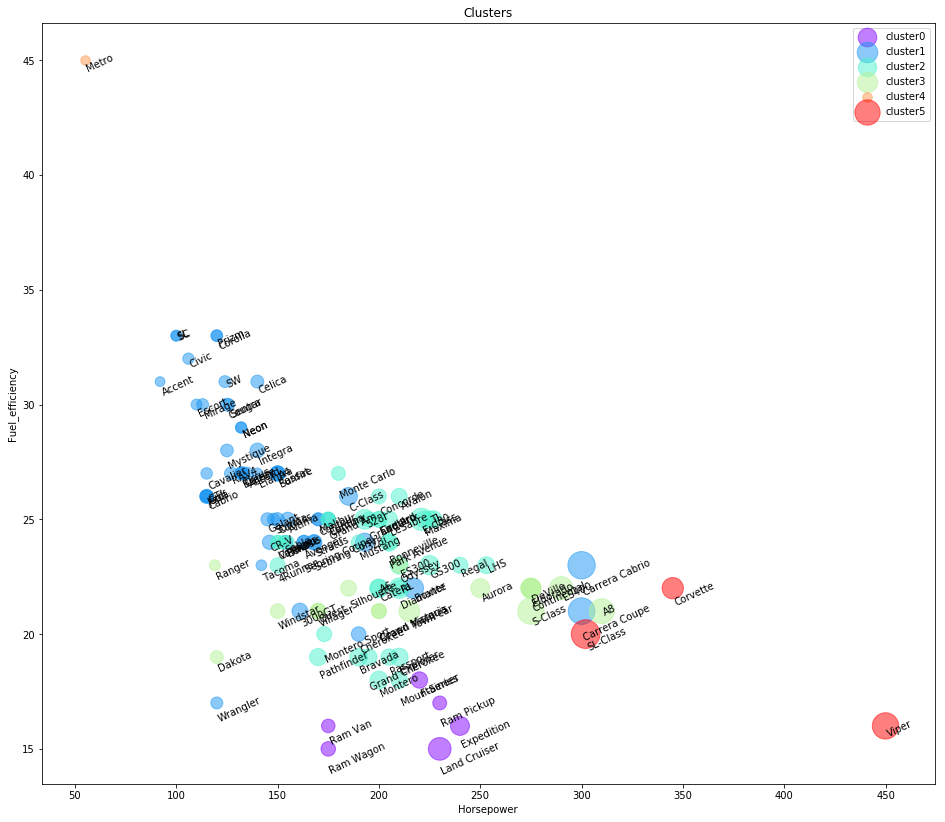

In [29]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
            plt.text(subset.Horsepower[i], subset.Fuel_efficiency[i],str(subset['Model'][i]), rotation=25) 
    plt.scatter(subset.Horsepower, subset.Fuel_efficiency, s= subset.Price_in_thousands*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.Horsepower, subset.Fuel_efficiency)
plt.legend()
plt.title('Clusters')
plt.xlabel('Horsepower')
plt.ylabel('Fuel_efficiency')

As you can see, we are seeing the distribution of each cluster using the scatter plot, but it is not very clear where is the centroid of each cluster. Moreover, there are 2 types of vehicles in our dataset, "Passenger" and "Car". So, we use them to distinguish the classes, and summarize the cluster. First we count the number of cases in each group:

In [30]:
df.groupby(['cluster_','Vehicle_type'])['cluster_'].count()

cluster_  Vehicle_type
0         Car              6
1         Car              5
          Passenger       47
2         Car             11
          Passenger       27
3         Car              7
          Passenger       10
4         Passenger        1
5         Passenger        3
Name: cluster_, dtype: int64

Now we can look at the characteristics of each cluster:

In [31]:
agg_cars = df.groupby(['cluster_','Vehicle_type'])['Horsepower','Engine_size','Fuel_efficiency','Price_in_thousands'].mean()
agg_cars

Horsepower  Engine_size  Fuel_efficiency  \
cluster_ Vehicle_type                                             
0        Car           211.666667     4.483333        16.166667   
1        Car           145.000000     2.580000        22.200000   
         Passenger     146.531915     2.246809        27.021277   
2        Car           182.090909     3.345455        20.181818   
         Passenger     203.111111     3.303704        24.222222   
3        Car           160.571429     3.071429        21.428571   
         Passenger     256.500000     4.410000        21.500000   
4        Passenger      55.000000     1.000000        45.000000   
5        Passenger     365.666667     6.233333        19.333333   

                       Price_in_thousands  
cluster_ Vehicle_type                      
0        Car                    29.024667  
1        Car                    17.009200  
         Passenger              20.306128  
2        Car                    26.265364  
         Passenger              27.750593  
3        Car                    21.527714  
         Passenger              42.870400  
4        Passenger               9.235000  
5        Passenger              66.010000

It is obvious that we have 3 main clusters with the majority of vehicles in those.

__Cars__:
- Cluster 1: with almost high Fuel_efficiency, and low in Horsepower.
- Cluster 2: with good Fuel_efficiency and Horsepower, but higher Price_in_thousands than average.
- Cluster 3: with low Fuel_efficiency, high Horsepower, highest Price_in_thousands.
    
    
    
__Passenger__:
- Cluster 1: with almost highest Fuel_efficiency among trucks, and lowest in Horsepower and Price_in_thousands.
- Cluster 2: with almost low Fuel_efficiency and medium Horsepower, but higher Price_in_thousands than average.
- Cluster 3: with good Fuel_efficiency and Horsepower, low Price_in_thousands.


Please notice that we did not use __Vehicle_type__ , and __Price_in_thousands__ of cars in the clustering process, but Hierarchical clustering could forge the clusters and discriminate them with quite high accuracy.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0, 0.5, 'Fuel_efficiency')

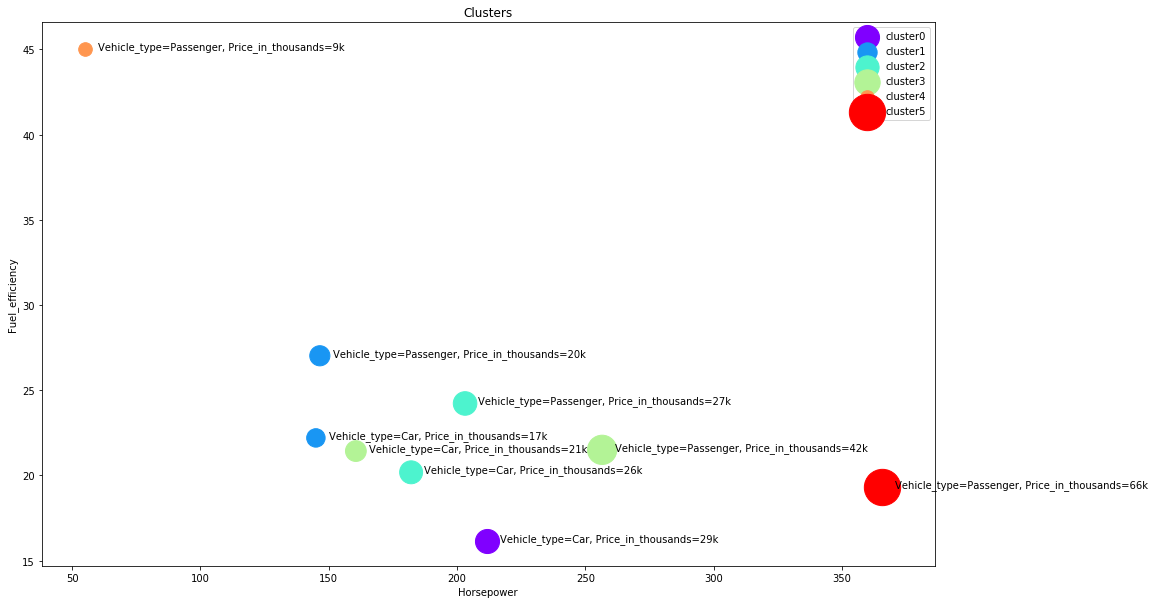

In [32]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'Vehicle_type='+str(i) + ', Price_in_thousands='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.Horsepower, subset.Fuel_efficiency, s=subset.Price_in_thousands*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('Horsepower')
plt.ylabel('Fuel_efficiency')